In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df_ad = pd.read_csv('advertising.csv')
df_ad.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


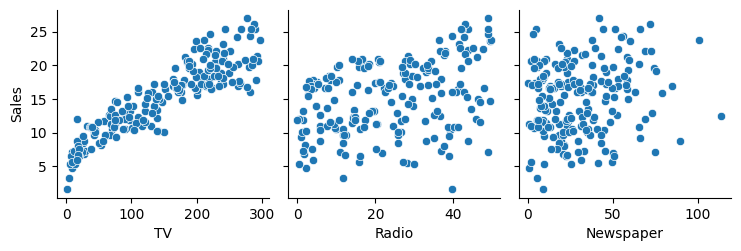

In [12]:
# To get intution will plot the scatter plot among the target variables and the predicted variable
# Target Variables: TV, Radio, Newspaper, Sales  
# Predicted variable: Sales

sns.pairplot(data = df_ad, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', kind = 'scatter')
plt.show()

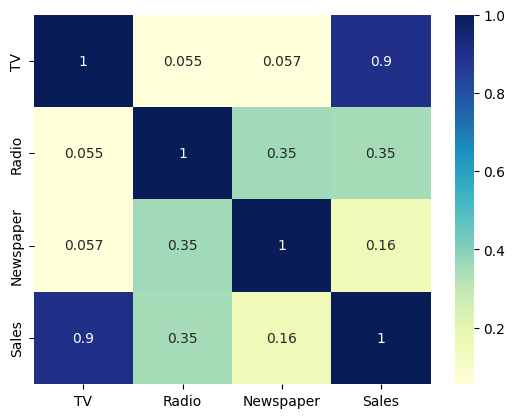

In [16]:
# Plotting heatmaps to find out correlation

sns.heatmap(data = df_ad.corr(), cmap = "YlGnBu", annot = True)
plt.show()


# Will choose TV as a feature for this Linear Regression because TV is most correlated to sales in Scatter Plot and in Heatmap as well.

In [17]:
# Will assign the feature variable (TV) - x and response variable (Sales) - y
# Model Building using 'statmodels'

x = df_ad['TV']
y = df_ad['Sales']

In [19]:
# Splitting data into Train - 70% and Test - 30% data using sklearn

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [22]:
x_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [23]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [24]:
y_test.head()

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

In [26]:
print( x_train.shape )
print( x_test.shape )
print( y_train.shape )
print( y_test.shape )

(140,)
(60,)
(140,)
(60,)


## Building a Linear Regression Model

In [30]:
# importing statmodels library to perform linear regression

import statsmodels.api as sm

In [31]:
# Add a contant to get an intercept
x_train_sm = sm.add_constant(x_train)


# Fit the linear regression using OLS(Ordinary least Squares)
lr = sm.OLS(y_train, x_train_sm).fit()

In [32]:
# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [33]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.52e-52
Time:                        17:54:40   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

### The values we are concerned with are -

1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance


In [35]:
# Add a constant to X_test
x_test_sm = sm.add_constant(x_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(x_test_sm)

In [36]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

## Checking Evaluation Metrics

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [40]:
# RMSE Value

print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
      
# R2 Value
(print("R2 Score:", r2_score(y_test, y_pred)))

RMSE:  2.019296008966232
R2 Score: 0.792103160124566
